In [14]:
from trajectory import *

# Figure 8

In [15]:
t = TrajectoryTelemetry("data/tcr-0525-183653.csv")

## Trajectory vs Odometry End Pose

In [16]:
t.end_pose()

,traj_x,traj_y,odom_x,odom_y,odom_deg
1172,3.0,-2.0,3.05783,-1.985886,0.48


### Measured
- x error = 10 cm
- y error = 0 cm

## Trajectory and Odometry

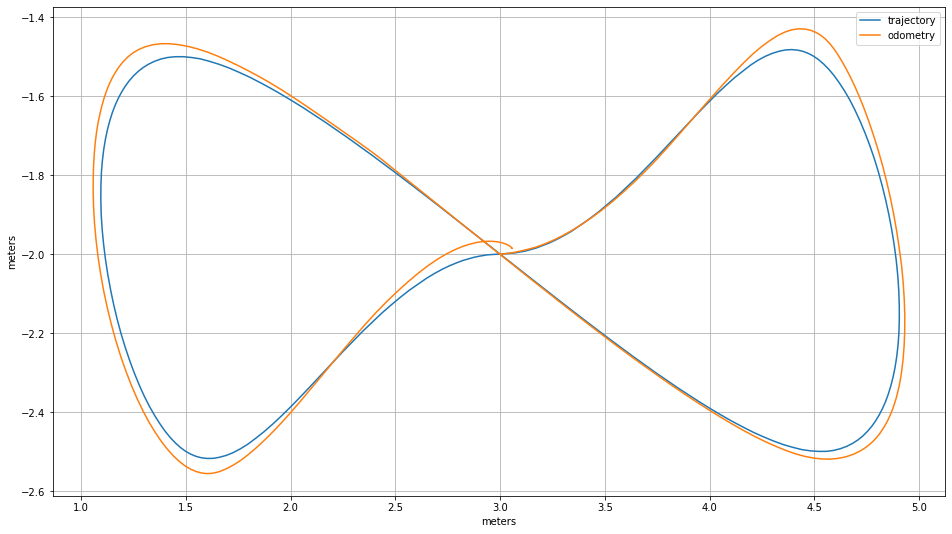

In [17]:
interval = t.make_interval() #start=5200)
_, ax1 = plt.subplots(1, 1, figsize=(16,9))
t.plot_trajectory(ax=ax1, interval=interval)


## Velocities and Pose XY Error

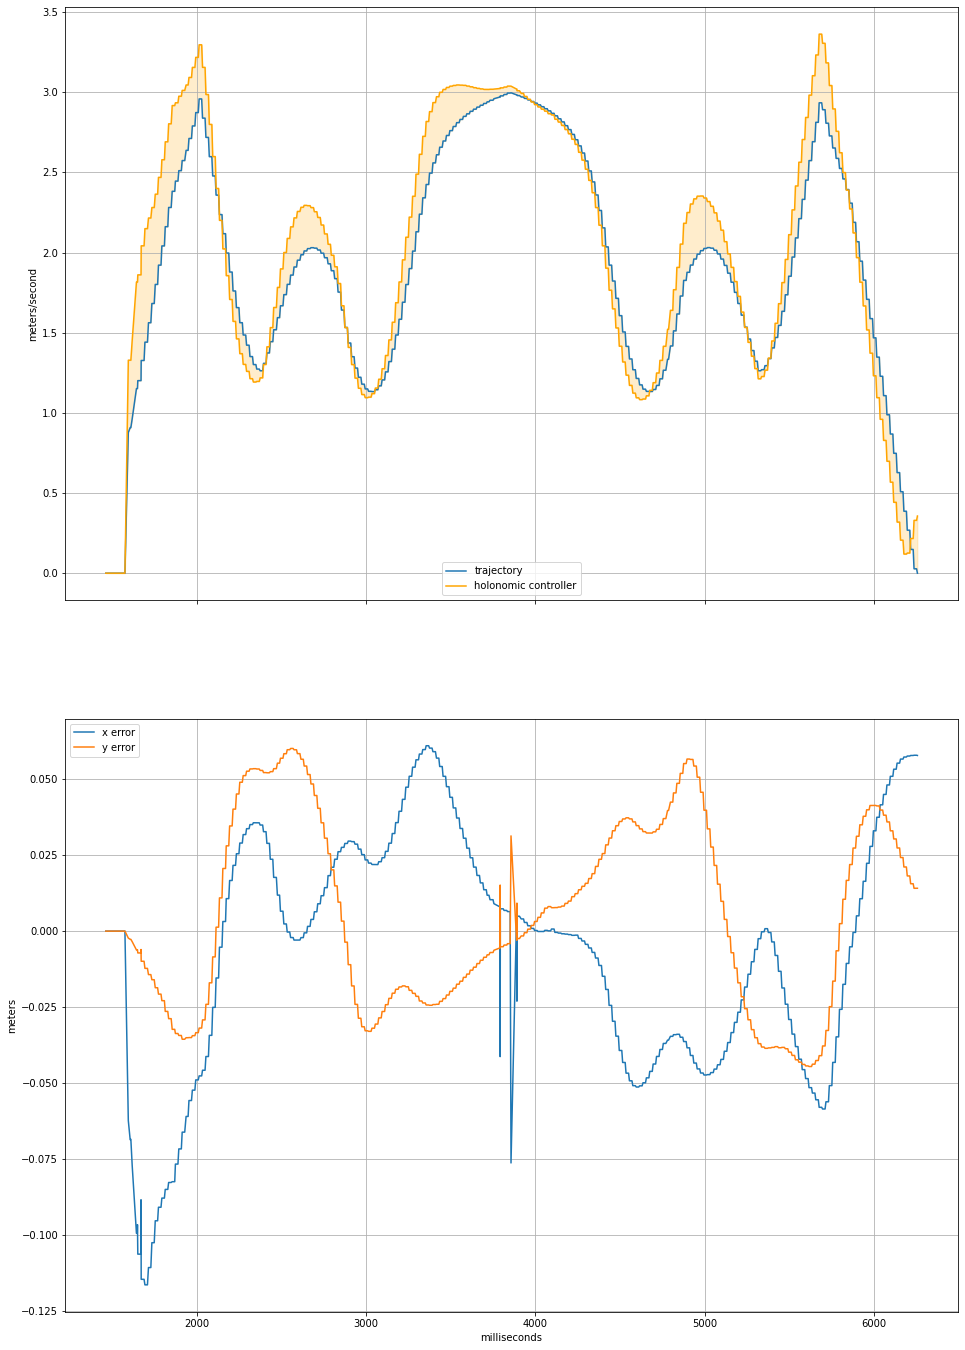

In [18]:
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 24), sharex=True)
t.plot_velocity(ax=ax1, controller=True, setpoint=False, drive=False, interval=interval)
t.plot_error(ax=ax2, interval=interval)


## Drive Setpoint vs Output

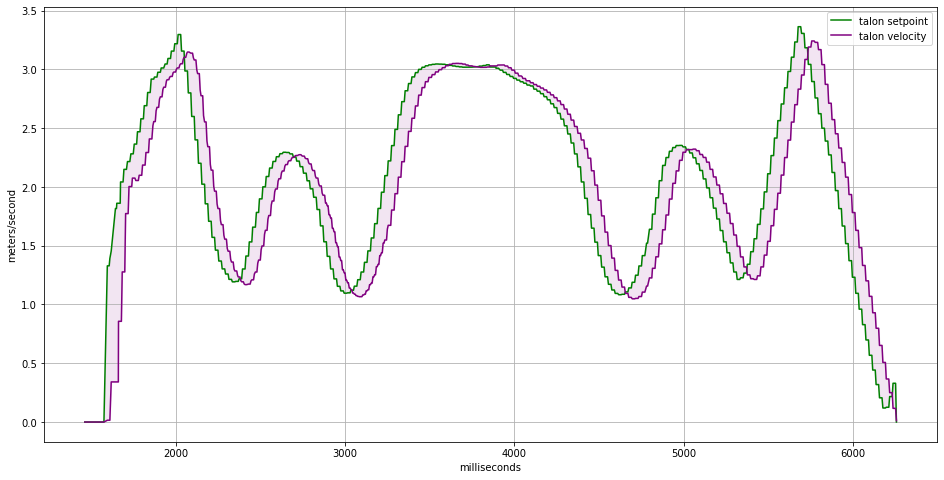

In [19]:
_, ax1 = plt.subplots(1, 1, figsize=(16, 8), sharex=True)
t.plot_velocity(controller=False, trajectory=False, ax=ax1)

## Pose Angle Error

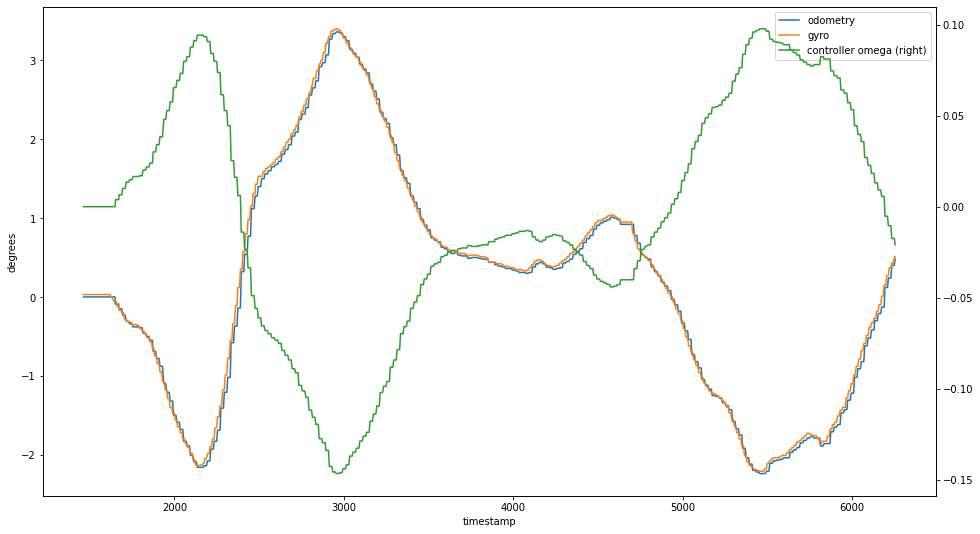

In [20]:
_, ax1 = plt.subplots(1, 1, figsize=(16,9))
t.plot_yaw(ax=ax1, gyro=True)

## Trajectory Start Delay

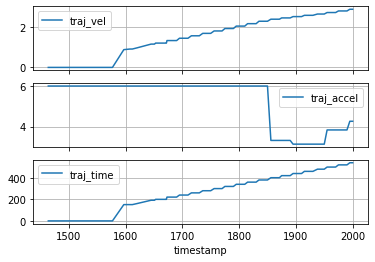

In [21]:
_, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
interval = t.make_interval(end=2000)
t.df[interval].plot(x='timestamp', y='traj_vel', ax=ax1)
t.df[interval].plot(x='timestamp', y='traj_accel', ax=ax2)
t.df[interval].plot(x='timestamp', y='traj_time', ax=ax3)
ax1.grid()
ax2.grid()
ax3.grid()

## Telemetry Packet Interval Jitter

count    959.000000
mean       4.995829
std        2.245381
min        0.000000
25%        5.000000
50%        5.000000
75%        5.000000
max       36.000000
Name: timestamp, dtype: float64


<AxesSubplot:ylabel='Frequency'>

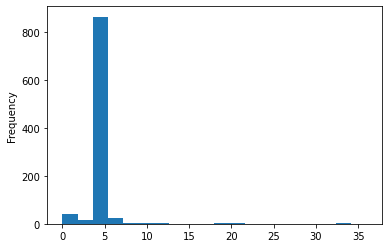

In [22]:
print(t.df[t.interval]['timestamp'].diff().describe())
t.df[t.interval]['timestamp'].diff().plot.hist(bins=20)